In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt  # Added for visualization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##            Loading Data

In [2]:
data = pd.read_csv('test.csv',encoding='ISO-8859-1')

## Preprocess the text data

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aaryan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aaryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
stop_words = set(stopwords.words('english'))

## Modify the preprocess_text function to handle NaN values

In [5]:
def preprocess_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        return ' '.join(words)
    else:
        return ''

In [6]:
data['processed_text'] = data['text'].apply(preprocess_text)

## Drop rows with NaN in sentiment or processed_text

In [7]:
data.dropna(subset=['sentiment', 'processed_text'], inplace=True)

## positive' and 'negative' sentiments

In [8]:
data = data[data['sentiment'].isin(['positive', 'negative'])]
#mapping sentiments
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

## Representation of sentiments

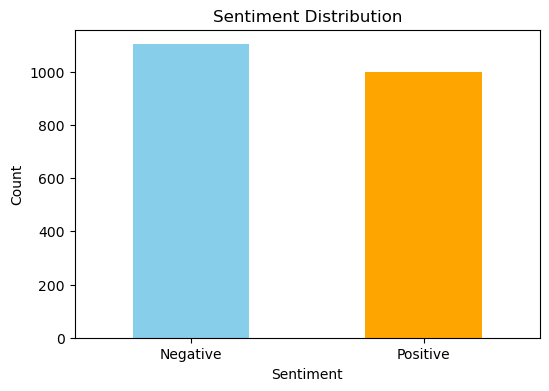

In [9]:
plt.figure(figsize=(6, 4))
data['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

## Split the data into training and testing sets

In [10]:
X = data['processed_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TF-IDF vectorization

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)  # Use the top 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Train a sentiment analysis model (SVM classifier in this case)

In [12]:
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [13]:
# Predictions
y_pred = model.predict(X_test_tfidf)


# Evaluate the model

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.833729216152019
